<h2 align="center">Simple Linear Regression</h2>

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

### Task 2: Loading the Data and Importing Libraries
---

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Advertising1.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Task 3: Remove the index column

In [4]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
data.head() 

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Task 4: Exploratory Data Analysis

C:\Users\Amir\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

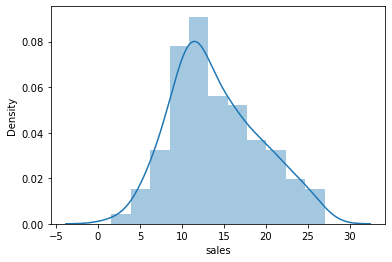

In [6]:
import seaborn as sns
sns.distplot(data.sales)

C:\Users\Amir\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

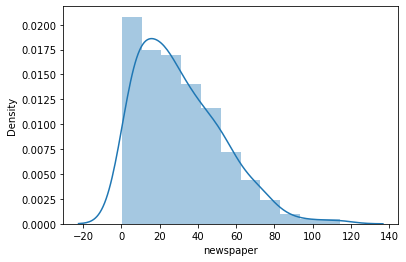

In [7]:
sns.distplot(data.newspaper)

C:\Users\Amir\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='radio', ylabel='Density'>

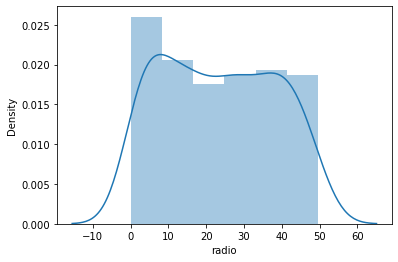

In [8]:
sns.distplot(data.radio)

C:\Users\Amir\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TV', ylabel='Density'>

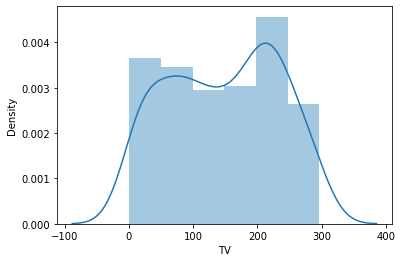

In [9]:
sns.distplot(data.TV)

### Task 5: Exploring Relationships between Predictors and Response

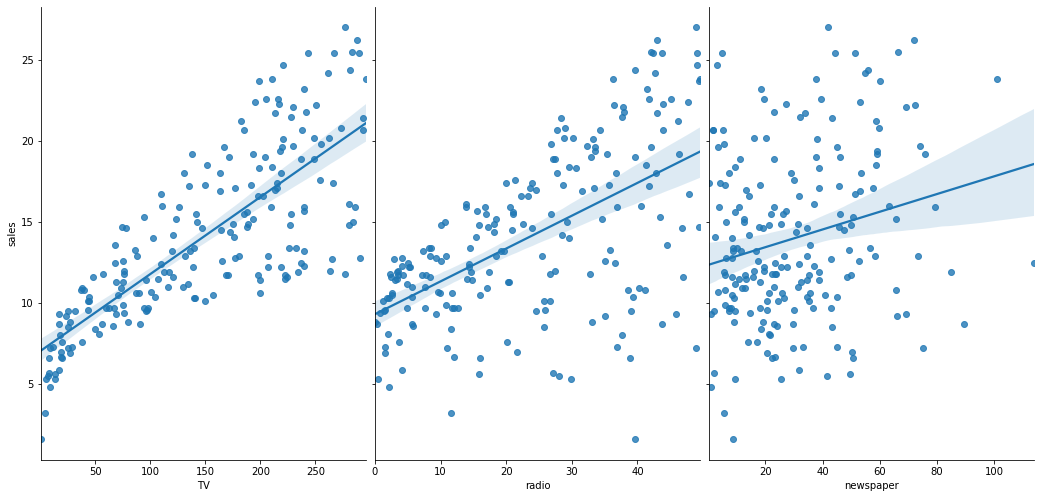

In [10]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7,
            kind='reg')

In [11]:
data.TV.corr(data.sales)

0.7822244248616066

In [12]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

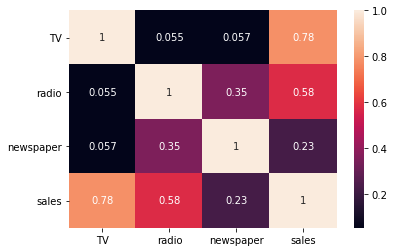

In [13]:
sns.heatmap(data.corr(),annot=True)

### Task 6: Creating the Simple Linear Regression Model

General linear regression model:
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}$

- $y$  is the response
- $\beta_{0}$ is the intercept
- $\beta_{1}$ is the coefficient for  x1  (the first feature)
- $\beta_{n}$ is the coefficient for  xn  (the nth feature)

In our case: $y=\beta_{0}+\beta_{1}×TV+\beta_{2}×Radio+\beta_{3}×Newspaper$

The $\beta$ values are called the **model coefficients*:

- These values are "learned" during the model fitting step using the "least squares" criterion
- The fitted model is then used to make predictions

In [14]:
X = data[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [15]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [16]:
y = data.sales
print(type(y))

<class 'pandas.core.series.Series'>


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(X_train.shape)
print(X_test.shape)

(150, 1)
(50, 1)
(150, 1)
(50, 1)


In [19]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

### Task 7: Interpreting Model Coefficients

In [20]:
print(linreg.intercept_)

6.91197261886872


In [21]:
print(linreg.coef_)

[0.04802945]


### Task 8: Making Predictions with our Model

In [22]:
y_pred = linreg.predict( X_test)

In [23]:
y_pred[:5]

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704])

In [24]:
df = pd.DataFrame({'Actual' : y_test, "Predicted" : y_pred})
print(df)

     Actual  Predicted
58     23.8  17.036581
40     16.6  16.637936
34      9.5  11.508391
102    14.8  20.369825
184    17.6  19.101847
198    25.5  20.533125
95     16.9  14.755182
4      12.9  15.595697
29     10.5  10.302852
168    17.1  17.257516
171    14.5  14.812817
18     11.3  10.235611
11     17.4  17.223896
89     16.7  12.185606
110    13.4  17.757022
118    15.9  12.949274
159    12.9  13.237451
35     12.8  20.874134
136     9.5   8.141527
59     18.4  17.031778
51     10.7  11.734129
16     12.5  10.168369
44      8.5   8.117512
94     11.5  12.070336
31     11.9  12.334498
162    14.9  15.960721
38     10.1   8.982042
28     18.9  18.861700
193    19.6  14.923285
27     15.9  18.443844
47     23.2  18.434238
165    11.9  18.174879
194    17.3  14.101981
177    11.7  15.086585
176    20.2  18.842488
97     15.5  15.792618
174    11.5  17.593722
73     11.0  13.126983
69     22.3  17.324757
172     7.6   7.853350
108     5.3   7.541158
107     8.7  11.253835
189     6.7

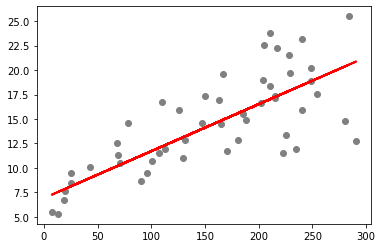

In [25]:
plt.scatter(X_test, y_test, color='grey')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### Task 9: Model Evaluation Metrics

In [26]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

In [27]:
print((10 + 0 + 20 + 10) / 4)
from sklearn import metrics
print(metrics.mean_absolute_error(true,pred))

10.0
10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [28]:
mse = metrics.mean_squared_error(true,pred)
print(mse)

150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [29]:
rmse = np.sqrt(mse)
print(rmse)

12.24744871391589


In [30]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

3.210929707703542
